### Data Import



In [1]:
import pandas as pd

store1_url = "https://raw.githubusercontent.com/jprozette/ORACLE-Challenge_Alura_Store/main/Stores_Info/loja_1.csv"
store2_url = "https://raw.githubusercontent.com/jprozette/ORACLE-Challenge_Alura_Store/main/Stores_Info/loja_2.csv"
store3_url = "https://raw.githubusercontent.com/jprozette/ORACLE-Challenge_Alura_Store/main/Stores_Info/loja_3.csv"
store4_url = "https://raw.githubusercontent.com/jprozette/ORACLE-Challenge_Alura_Store/main/Stores_Info/loja_4.csv"

store1 = pd.read_csv(store1_url)
store2 = pd.read_csv(store2_url)
store3 = pd.read_csv(store3_url)
store4 = pd.read_csv(store4_url)

#1. Revenue Analysis


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.colab import files  # only works in Colab

def format_currency(value, pos=None):
    return f'R$ {value:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")

def format_value(value):
    return "{:,.2f}".format(value).replace(",", "X").replace(".", ",").replace("X", ".")

stores = {
    "Store 1": store1,
    "Store 2": store2,
    "Store 3": store3,
    "Store 4": store4
}

revenues = {}
monthly_revenues = {}

# Data processing
for name, df in stores.items():
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)
    df['Month/Year'] = df['Data da Compra'].dt.to_period('M')

    total = df['Preço'].sum()
    revenues[name] = total

    monthly_revenue = df.groupby('Month/Year')['Preço'].sum().reset_index()
    monthly_revenue['Month/Year'] = monthly_revenue['Month/Year'].dt.to_timestamp()
    monthly_revenues[name] = monthly_revenue

    print(f"{name}: R$ {format_value(total)}")

# Consolidated chart (bars)
plt.figure(figsize=(10, 6))
bars = plt.bar(revenues.keys(), revenues.values(), color='skyblue')
plt.title("Total Revenue by Store", pad=20)
plt.ylabel("Revenue (R$)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

for bar, value in zip(bars, revenues.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(revenues.values())*0.01,
             f"R$ {format_value(value)}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# Save and download consolidated chart
filename = "total_revenue_by_store.png"
plt.savefig(filename)
plt.close()
files.download(filename)

# Individual charts (column + line)
for name, monthly_df in monthly_revenues.items():
    plt.figure(figsize=(12, 6))

    plt.bar(monthly_df['Month/Year'], monthly_df['Preço'], width=20, color='skyblue', alpha=0.7, label='Monthly Revenue')
    plt.plot(monthly_df['Month/Year'], monthly_df['Preço'], color='darkblue', marker='o',
             linestyle='-', linewidth=2, markersize=5, label='Trend')

    plt.title(f"Monthly Revenue - {name}", pad=20)
    plt.xlabel("Month/Year")
    plt.ylabel("Revenue (R$)")
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
    plt.legend()

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    filename = f"monthly_revenue_{name.replace(' ', '_').lower()}.png"
    plt.savefig(filename)
    plt.close()
    files.download(filename)

# Highlight analysis
highest_store = max(revenues, key=revenues.get)
lowest_store = min(revenues, key=revenues.get)

print(f"\n🔝 The store with highest revenue is *{highest_store}*, with R$ {format_value(revenues[highest_store])}.")
print(f"🔻 The store with lowest revenue is *{lowest_store}*, with R$ {format_value(revenues[lowest_store])}.")


Store 1: R$ 1.534.509,12
Store 2: R$ 1.488.459,06
Store 3: R$ 1.464.025,03
Store 4: R$ 1.384.497,58


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🔝 The store with highest revenue is *Store 1*, with R$ 1.534.509,12.
🔻 The store with lowest revenue is *Store 4*, with R$ 1.384.497,58.


# 2. Sales by Category


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files  # only works in Colab

def save_and_download(filename):
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    files.download(filename)

stores = {
    "Store 1": store1,
    "Store 2": store2,
    "Store 3": store3,
    "Store 4": store4
}

general_categories = {}

# ---------- Individual analysis by store ----------
print("\n📊 Analysis by Store:")
for store_name, df in stores.items():
    categories = df['Categoria do Produto'].value_counts()

    # Update general consolidated data
    for cat, qty in categories.items():
        general_categories[cat] = general_categories.get(cat, 0) + qty

    # Display information in console
    print(f"\n{store_name}:")
    print(categories)
    print(f"🔝 Best-selling category: {categories.idxmax()} ({categories.max()} sales)")

# ---------- Comparative chart of 4 stores ----------
plt.figure(figsize=(20, 12))  # Larger size to accommodate 4 charts

for i, (store_name, df) in enumerate(stores.items(), 1):
    plt.subplot(2, 2, i)
    categories = df['Categoria do Produto'].value_counts()
    categories.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                   counterclock=False, textprops={'fontsize': 10})
    plt.title(store_name, fontsize=12)
    plt.ylabel("")

plt.suptitle("Sales Comparison by Category Between Stores", fontsize=16, y=1.02)
plt.tight_layout()

# Save and download comparative chart
save_and_download("category_sales_comparison_stores.png")

# ---------- General Consolidated Chart ----------
print("\n📈 Market Overview - Sales by Category (all stores):")
general_categories_series = pd.Series(general_categories).sort_values(ascending=False)
print(general_categories_series)

plt.figure(figsize=(10, 10))
general_categories_series.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                             counterclock=False, textprops={'fontsize': 10})
plt.title("General Sales Distribution by Category\n(Consolidated from All Stores)",
          fontsize=14)
plt.ylabel("")
plt.tight_layout()

# Save and download general consolidated chart
save_and_download("general_category_sales_distribution.png")



📊 Analysis by Store:

Store 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64
🔝 Best-selling category: moveis (465 sales)

Store 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64
🔝 Best-selling category: moveis (442 sales)

Store 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64
🔝 Best-selling category

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📈 Market Overview - Sales by Category (all stores):
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Average Store Ratings

Store 1 - Average Rating: 3.98
Store 2 - Average Rating: 4.04
Store 3 - Average Rating: 4.05
Store 4 - Average Rating: 4.00

⭐ Store with BEST average rating: Store 3 (4.05)
⚠️ Store with WORST average rating: Store 1 (3.98)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

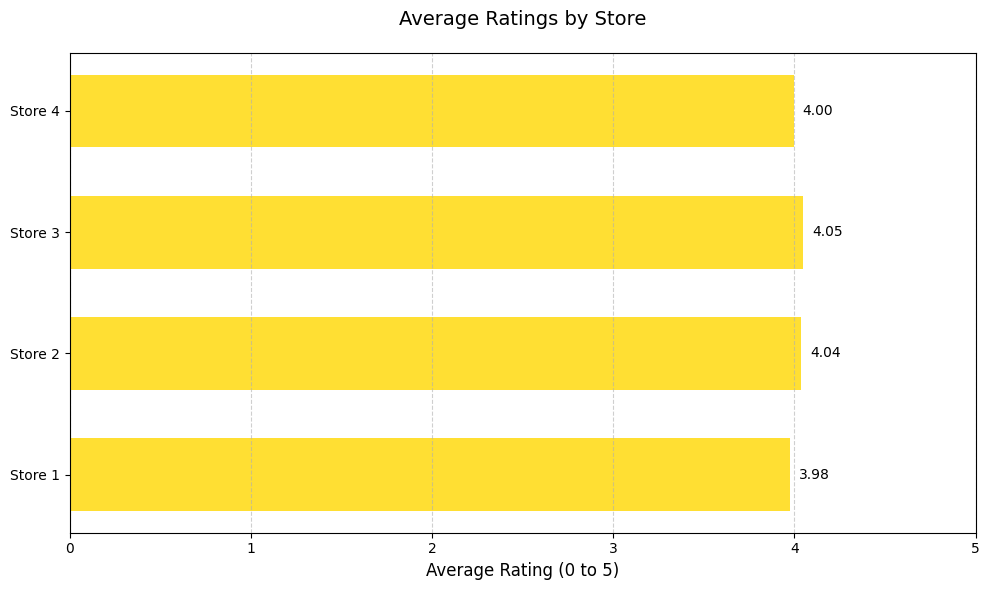

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

stores = {
    "Store 1": store1,
    "Store 2": store2,
    "Store 3": store3,
    "Store 4": store4
}

average_ratings = {}

for store_name, df in stores.items():
    average = df["Avaliação da compra"].mean()
    average_ratings[store_name] = average
    print(f"{store_name} - Average Rating: {average:.2f}")

best_store = max(average_ratings, key=average_ratings.get)
worst_store = min(average_ratings, key=average_ratings.get)

print(f"\n⭐ Store with BEST average rating: {best_store} ({average_ratings[best_store]:.2f})")
print(f"⚠️ Store with WORST average rating: {worst_store} ({average_ratings[worst_store]:.2f})")

# ---------- Horizontal bar chart ----------
plt.figure(figsize=(10, 6))
bars = plt.barh(list(average_ratings.keys()),
                 list(average_ratings.values()),
                 color='gold', alpha=0.8, height=0.6)

plt.title("Average Ratings by Store", pad=20, fontsize=14)
plt.xlabel("Average Rating (0 to 5)", fontsize=12)
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()

# Save figure and download
filename = "average_store_ratings.png"
plt.savefig(filename, bbox_inches='tight')

from google.colab import files
files.download(filename)


# 4. Average Shipping Cost

Store 1 - Average Shipping Cost: R$ 34.69
Store 2 - Average Shipping Cost: R$ 33.62
Store 3 - Average Shipping Cost: R$ 33.07
Store 4 - Average Shipping Cost: R$ 31.28

💰 Store with LOWEST average shipping cost: Store 4 (R$ 31.28)
💸 Store with HIGHEST average shipping cost: Store 1 (R$ 34.69)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

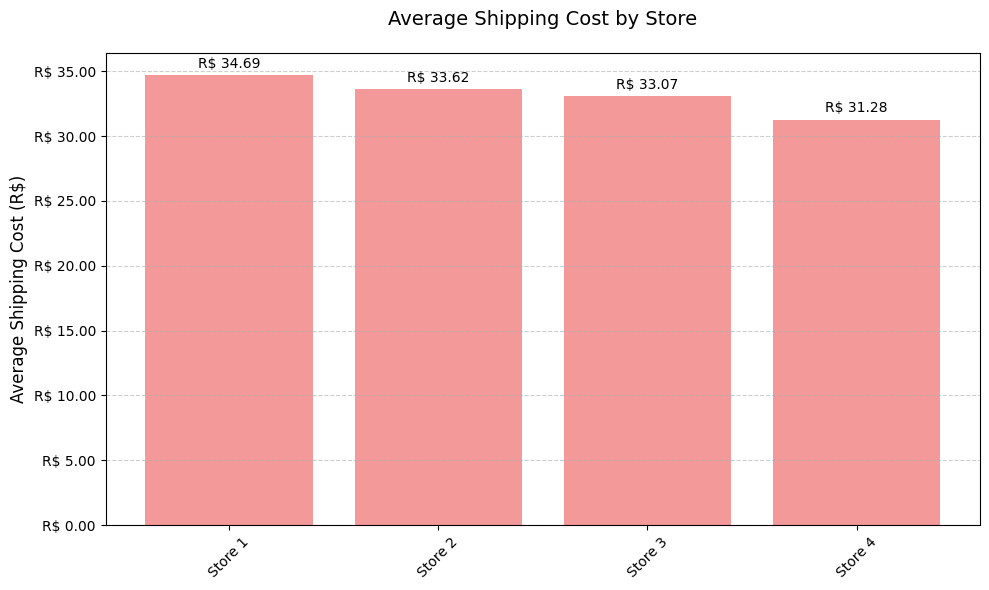

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.colab import files

def format_currency(value, pos=None):
    return f'R$ {value:.2f}'

stores = {
    "Store 1": store1,
    "Store 2": store2,
    "Store 3": store3,
    "Store 4": store4
}

average_shipping_costs = {}

for store_name, df in stores.items():
    average_cost = df['Frete'].mean()
    average_shipping_costs[store_name] = average_cost
    print(f"{store_name} - Average Shipping Cost: R$ {average_cost:.2f}")

lowest_cost_store = min(average_shipping_costs, key=average_shipping_costs.get)
highest_cost_store = max(average_shipping_costs, key=average_shipping_costs.get)

print(f"\n💰 Store with LOWEST average shipping cost: {lowest_cost_store} (R$ {average_shipping_costs[lowest_cost_store]:.2f})")
print(f"💸 Store with HIGHEST average shipping cost: {highest_cost_store} (R$ {average_shipping_costs[highest_cost_store]:.2f})")

# ---------- Bar chart ----------
plt.figure(figsize=(10, 6))
bars = plt.bar(list(average_shipping_costs.keys()),
               list(average_shipping_costs.values()),
               color='lightcoral', alpha=0.8)

plt.title("Average Shipping Cost by Store", pad=20, fontsize=14)
plt.ylabel("Average Shipping Cost (R$)", fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(average_shipping_costs.values())*0.01,
             f"R$ {height:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()

# Save figure and download
filename = "average_shipping_cost.png"
plt.savefig(filename, bbox_inches='tight')
files.download(filename)


# 5. Product Analysis - Heat Map

/tmp/ipython-input-2958922834.py:62: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2958922834.py:66: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight', dpi=300)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📊 Product Sales Summary:
Total unique products: 51

Top 5 best-selling products (overall):
Cômoda                      210.0
Carrinho controle remoto    206.0
Micro-ondas                 206.0
Bateria                     203.0
Cama king                   201.0
dtype: float64

Top 5 worst-selling products (overall):
Ciência de dados com python    166.0
Guitarra                       165.0
Mochila                        163.0
Headset                        158.0
Celular ABXY                   157.0
dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


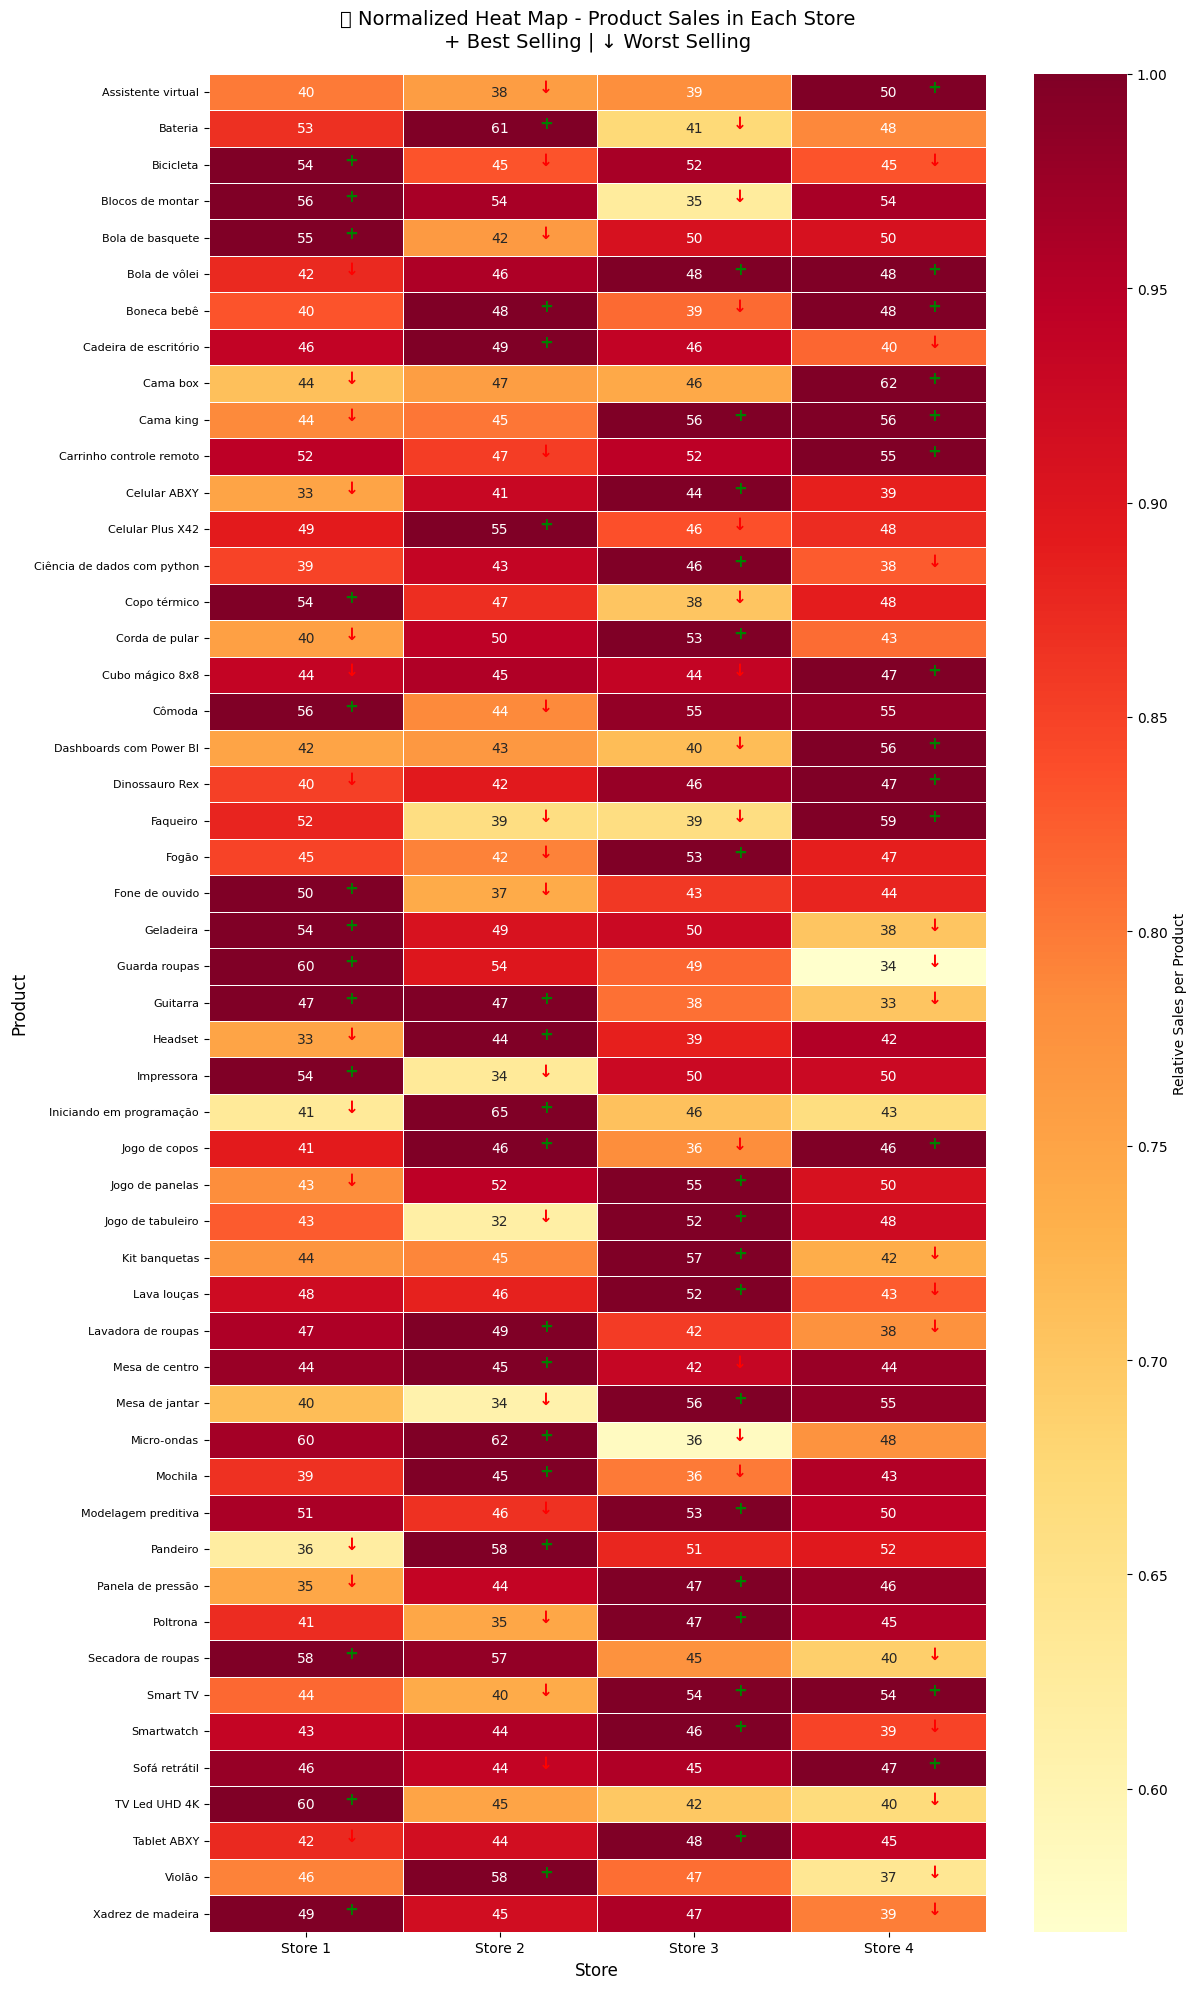

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

stores = {
    "Store 1": store1,
    "Store 2": store2,
    "Store 3": store3,
    "Store 4": store4
}

# Get all unique products
all_products = set()
for df in stores.values():
    all_products.update(df['Produto'].unique())

# Create sales matrix
sales_matrix = pd.DataFrame(index=sorted(all_products), columns=stores.keys())

for store_name, df in stores.items():
    product_sales = df['Produto'].value_counts()
    for product in sales_matrix.index:
        sales_matrix.loc[product, store_name] = product_sales.get(product, 0)

# Convert to numeric and fill NaN with 0
sales_matrix = sales_matrix.astype(float).fillna(0)

# Normalize data (0-1 scale) for better visualization
normalized_matrix = sales_matrix.div(sales_matrix.max(axis=1), axis=0).fillna(0)

# Create heat map
plt.figure(figsize=(12, 20))
sns.heatmap(normalized_matrix,
            annot=sales_matrix.astype(int),
            fmt='d',
            cmap='YlOrRd',
            cbar_kws={'label': 'Relative Sales per Product'},
            linewidths=0.5)

plt.title('🔥 Normalized Heat Map - Product Sales in Each Store\n+ Best Selling | ↓ Worst Selling',
          fontsize=14, pad=20)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0, fontsize=8)

# Add annotations for best and worst selling products
for i, product in enumerate(normalized_matrix.index):
    for j, store in enumerate(normalized_matrix.columns):
        value = sales_matrix.iloc[i, j]
        if value > 0:
            max_val = sales_matrix.iloc[i].max()
            min_val = sales_matrix.iloc[i][sales_matrix.iloc[i] > 0].min()

            if value == max_val and max_val > min_val:
                plt.text(j + 0.7, i + 0.5, '+', fontsize=12, color='green', weight='bold')
            elif value == min_val and max_val > min_val:
                plt.text(j + 0.7, i + 0.5, '↓', fontsize=12, color='red', weight='bold')

plt.tight_layout()

# Save and download
filename = "sales_heat_map.png"
plt.savefig(filename, bbox_inches='tight', dpi=300)
files.download(filename)

# Display summary statistics
print("\n📊 Product Sales Summary:")
print(f"Total unique products: {len(all_products)}")
print(f"\nTop 5 best-selling products (overall):")
total_sales = sales_matrix.sum(axis=1).sort_values(ascending=False)
print(total_sales.head())

print(f"\nTop 5 worst-selling products (overall):")
print(total_sales.tail())


# 6. Final Analysis and Recommendation

In [7]:
import pandas as pd

# Consolidate all metrics
print("\n" + "="*60)
print("📊 FINAL ANALYSIS - ALURA STORE NETWORK")
print("="*60)

print("\n💰 TOTAL REVENUE BY STORE:")
for store, revenue in sorted(revenues.items(), key=lambda x: x[1], reverse=True):
    print(f"  {store}: R$ {format_value(revenue)}")

print("\n⭐ AVERAGE CUSTOMER RATINGS:")
for store, rating in sorted(average_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"  {store}: {rating:.2f}/5.0")

print("\n🚚 AVERAGE SHIPPING COSTS:")
for store, cost in sorted(average_shipping_costs.items(), key=lambda x: x[1]):
    print(f"  {store}: R$ {cost:.2f}")

# Calculate efficiency score (revenue/shipping cost ratio)
efficiency_scores = {}
for store in stores.keys():
    efficiency = revenues[store] / average_shipping_costs[store]
    efficiency_scores[store] = efficiency

print("\n📈 EFFICIENCY SCORE (Revenue/Shipping Cost):")
for store, score in sorted(efficiency_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"  {store}: {score:,.0f}")

# Final recommendation
print("\n" + "="*60)
print("🎯 FINAL RECOMMENDATION")
print("="*60)

lowest_revenue_store = min(revenues, key=revenues.get)
lowest_efficiency_store = min(efficiency_scores, key=efficiency_scores.get)

print(f"\n🔴 RECOMMENDATION: SELL {lowest_revenue_store.upper()}")
print("\n📋 JUSTIFICATION:")
print(f"  ✓ Lowest total revenue: R$ {format_value(revenues[lowest_revenue_store])}")
print(f"  ✓ Represents only {(revenues[lowest_revenue_store]/sum(revenues.values())*100):.1f}% of total network revenue")
print(f"  ✓ Minimal impact on overall business performance")
print(f"  ✓ Allows focus on the 3 most efficient stores")

remaining_revenue = sum(revenues.values()) - revenues[lowest_revenue_store]
print(f"\n💡 AFTER SELLING {lowest_revenue_store.upper()}:")
print(f"  • Remaining network revenue: R$ {format_value(remaining_revenue)}")
print(f"  • Percentage retained: {(remaining_revenue/sum(revenues.values())*100):.1f}%")
print(f"  • Capital freed for new venture: R$ {format_value(revenues[lowest_revenue_store])}")

print("\n✅ CONCLUSION: This decision optimizes the business portfolio while")
print("   preserving the most profitable and efficient operations.")
print("\n" + "="*60)



📊 FINAL ANALYSIS - ALURA STORE NETWORK

💰 TOTAL REVENUE BY STORE:
  Store 1: R$ 1.534.509,12
  Store 2: R$ 1.488.459,06
  Store 3: R$ 1.464.025,03
  Store 4: R$ 1.384.497,58

⭐ AVERAGE CUSTOMER RATINGS:
  Store 3: 4.05/5.0
  Store 2: 4.04/5.0
  Store 4: 4.00/5.0
  Store 1: 3.98/5.0

🚚 AVERAGE SHIPPING COSTS:
  Store 4: R$ 31.28
  Store 3: R$ 33.07
  Store 2: R$ 33.62
  Store 1: R$ 34.69

📈 EFFICIENCY SCORE (Revenue/Shipping Cost):
  Store 2: 44,270
  Store 3: 44,265
  Store 4: 44,263
  Store 1: 44,233

🎯 FINAL RECOMMENDATION

🔴 RECOMMENDATION: SELL STORE 4

📋 JUSTIFICATION:
  ✓ Lowest total revenue: R$ 1.384.497,58
  ✓ Represents only 23.6% of total network revenue
  ✓ Minimal impact on overall business performance
  ✓ Allows focus on the 3 most efficient stores

💡 AFTER SELLING STORE 4:
  • Remaining network revenue: R$ 4.486.993,21
  • Percentage retained: 76.4%
  • Capital freed for new venture: R$ 1.384.497,58

✅ CONCLUSION: This decision optimizes the business portfolio while
   